In [3]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 


# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('c:/data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)


In [5]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)

c:\Users\user\miniconda3\envs\py\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
pred=lr_clf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [19]:
#### 추가
tmp=pd.DataFrame({'실제값':y_test, '예측값':pred})
혼돈값=[]
for 실제,예측 in zip(tmp['실제값'],tmp['예측값']):
    #print(실제,예측)
    if 실제==1 and 예측==1:
        #print('-----------------')
        혼돈값.append('TP')
    elif 실제==0 and 예측==0:
        혼돈값.append('TN')
    elif 실제==0 and 예측==1:
        혼돈값.append('FP')
    else: 
        실제==1 and 예측==0    
        혼돈값.append('FN')   # 실제는1인데 0이라고 잘못맞춤
tmp['혼돈']=혼돈값

import numpy as np
np.unique(tmp['혼돈'],return_counts=True)

##
          #예측값0    예측값1
# 실제 0    TN(104)    FP(14)
# 실제 1    FN(13)     TP(48)


(array(['FN', 'FP', 'TN', 'TP'], dtype=object),
 array([ 13,  14, 104,  48], dtype=int64))

In [ ]:
## 추가 - 지정한값의 count하는 수식 
findList=['FN', 'TN', 'TP', 'FP']
CountList=[]
for i in findList:
    Count=0
    for j in tmp['혼돈']:
        
        if i==j:
            
            Count=Count+1
    CountList.append(Count)

print(CountList)
        

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[104,  14],
       [ 13,  48]], dtype=int64)

<Axes: >

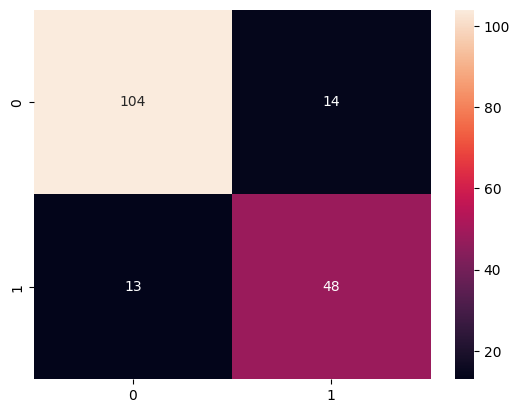

In [24]:
## 추가
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d',)

In [41]:
## 추가
from sklearn.metrics import classification_report
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       118
           1       0.77      0.79      0.78        61

    accuracy                           0.85       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



In [44]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:5]

array([[0.46174518, 0.53825482],
       [0.87863674, 0.12136326],
       [0.877169  , 0.122831  ],
       [0.88269448, 0.11730552],
       [0.85527328, 0.14472672]])

In [46]:
pred_proba[:,1][:5].reshape(-1,1)

array([[0.53825482],
       [0.12136326],
       [0.122831  ],
       [0.11730552],
       [0.14472672]])

In [51]:
#### 임계값 조정
from sklearn.preprocessing import Binarizer

# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold ,'----------------------------')
        report=classification_report(y_test,custom_predict)
        print(report)

  
get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4 ----------------------------
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       118
           1       0.72      0.84      0.77        61

    accuracy                           0.83       179
   macro avg       0.81      0.83      0.82       179
weighted avg       0.84      0.83      0.84       179

임곗값: 0.45 ----------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       118
           1       0.77      0.80      0.78        61

    accuracy                           0.85       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.85      0.85       179

임곗값: 0.5 ----------------------------
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       118
           1       0.77      0.79      0.78        61

    accuracy                           0.85       179
   macro avg 